# Linear Algebra Assignment


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Part A: Distance and Nearest Neighbors


In [35]:
# 1) Build a DataFrame with columns: cust_id, income, credit_score, status.
#    Use the same values as in math/01_LA.ipynb.
# 2) Implement compute_distance(a, b) for Euclidean distance.
# 3) For a new_customer = np.array([2.0, 430]), compute distance to each row.
# 4) Find the 2 closest customers and predict status by majority vote.


In [36]:
data = {
    'cust_id': [1, 2, 3, 4, 5,6],
    'income':[15,16,17,7,5,3],
    'credit_score':[750,780,800,450,430,350],
    'status':['Y','Y','Y','N','N','N']
}
df = pd.DataFrame(data)
df.head()

,cust_id,income,credit_score,status
0,1,15,750,Y
1,2,16,780,Y
2,3,17,800,Y
3,4,7,450,N
4,5,5,430,N


In [37]:
# Feature matrix (income, credit_score)
X = df[["income", "credit_score"]].values

# Labels
y = df["status"].values

X, y


(array([[ 15, 750],
        [ 16, 780],
        [ 17, 800],
        [  7, 450],
        [  5, 430],
        [  3, 350]]),
 array(['Y', 'Y', 'Y', 'N', 'N', 'N'], dtype=object))

In [38]:
def compute_distance(a, b):
    """
    Compute Euclidean distance between two points a and b
    """
    return np.sqrt(np.sum((a - b) ** 2))


In [39]:
compute_distance(
    np.array([15, 750]),
    np.array([16, 780])
)


np.float64(30.01666203960727)

In [40]:
# New customer given in assignment
new_customer = np.array([2.0, 430])

# Calculate distance for each customer
df["distance"] = df.apply(
    lambda row: compute_distance(
        np.array([row["income"], row["credit_score"]]),
        new_customer
    ),
    axis=1 # work with row
)

df


,cust_id,income,credit_score,status,distance
0,1,15,750,Y,320.263954
1,2,16,780,Y,350.279888
2,3,17,800,Y,370.303929
3,4,7,450,N,20.615528
4,5,5,430,N,3.000000
5,6,3,350,N,80.006250


In [41]:
# Sort customers by distance (ascending)
nearest_neighbors = df.sort_values(by="distance").head(2)

nearest_neighbors


,cust_id,income,credit_score,status,distance
4,5,5,430,N,3.000000
3,4,7,450,N,20.615528


In [42]:
# Predict status using majority vote
predicted_status = nearest_neighbors["status"].mode()[0]

predicted_status


'N'

## Part B: Visualization


In [43]:
# 5) Plot income vs credit_score with color by status.
# 6) Overlay the new_customer as a red point with a legend.


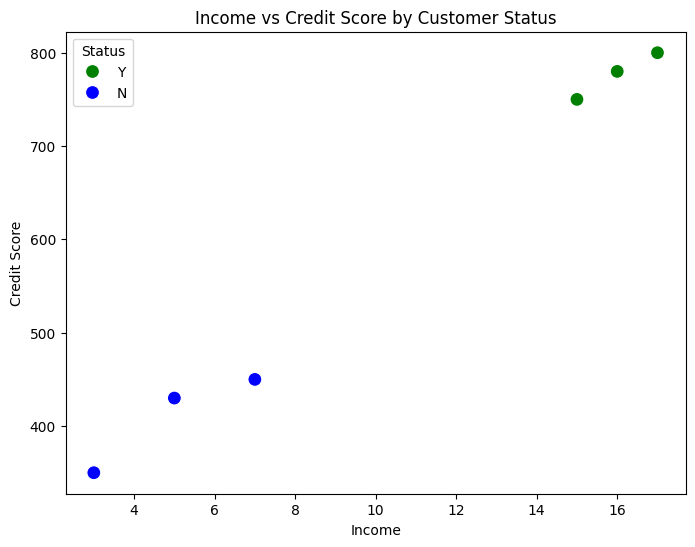

In [44]:
plt.figure(figsize=(8, 6))

# Scatter plot of existing customers
sns.scatterplot(
    data=df,
    x="income",
    y="credit_score",
    hue="status",
    palette={"Y": "green", "N": "blue"},
    s=100
)

plt.xlabel("Income")
plt.ylabel("Credit Score")
plt.title("Income vs Credit Score by Customer Status")
plt.legend(title="Status")

plt.show()


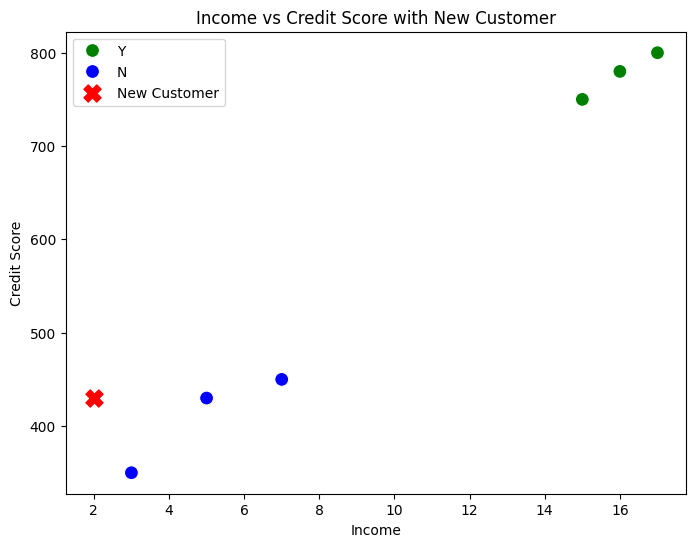

In [45]:
plt.figure(figsize=(8, 6))

# Scatter plot of existing customers
sns.scatterplot(
    data=df,
    x="income",
    y="credit_score",
    hue="status",
    palette={"Y": "green", "N": "blue"},
    s=100
)

# Plot the new customer
plt.scatter(
    new_customer[0],
    new_customer[1],
    color="red",
    s=150,
    label="New Customer",
    marker="X"
)

plt.xlabel("Income")
plt.ylabel("Credit Score")
plt.title("Income vs Credit Score with New Customer")
plt.legend()
plt.show()


## Part C: Add a Third Feature


In [46]:
# 7) Add #active_loans to the dataset (same as in math/01_LA.ipynb).
# 8) Update your distance function to handle 3 features.
# 9) Predict the status for new_customer = np.array([2.0, 430, 4]).


In [47]:
# Add active_loans feature
df["active_loans"] = [1, 2, 1, 4, 3, 5]

df

df_clean = df[["cust_id", "income", "credit_score", "status", "active_loans"]]
df_clean


,cust_id,income,credit_score,status,active_loans
0,1,15,750,Y,1
1,2,16,780,Y,2
2,3,17,800,Y,1
3,4,7,450,N,4
4,5,5,430,N,3
5,6,3,350,N,5


In [48]:
# New customer with 3 features
new_customer_3d = np.array([2.0, 430, 4])

# Compute distance using 3 features
df["distance_3d"] = df.apply(
    lambda row: compute_distance(
        np.array([row["income"], row["credit_score"], row["active_loans"]]),
        new_customer_3d
    ),
    axis=1
)
df_clean1 = df[["cust_id", "income", "credit_score", "status", "active_loans","distance_3d"]]
df_clean1


,cust_id,income,credit_score,status,active_loans,distance_3d
0,1,15,750,Y,1,320.278004
1,2,16,780,Y,2,350.285598
2,3,17,800,Y,1,370.316081
3,4,7,450,N,4,20.615528
4,5,5,430,N,3,3.162278
5,6,3,350,N,5,80.012499


In [49]:
# Find 2 nearest neighbors using 3D distance
nearest_neighbors_3d = df.sort_values(by="distance_3d").head()

nearest_neighbors_3d


,cust_id,income,credit_score,status,distance,active_loans,distance_3d
4,5,5,430,N,3.000000,3,3.162278
3,4,7,450,N,20.615528,4,20.615528
5,6,3,350,N,80.006250,5,80.012499
0,1,15,750,Y,320.263954,1,320.278004
1,2,16,780,Y,350.279888,2,350.285598


In [50]:
# Predict status using majority vote (3D)
predicted_status_3d = nearest_neighbors_3d["status"].mode()[0]

predicted_status_3d


'N'

## Part D: Decision Boundary (Linear Model)


In [51]:
# 10) Define weights w1, w2, w0 and plot a decision boundary line.
# 11) Implement prediction(income, credit_score) that uses the weights and returns class 0/1.
#     Note: Avoid typos like w2x; use w2 * credit_score.


In [52]:
# Define weights and bias
w1 = 0.05      # weight for income
w2 = 0.01      # weight for credit score
w0 = -6        # bias (intercept)


W1.income+W2.credit_score+W0=0

Solve for credit_score:

                       credit_score= -(W1.income+W0)
                                   -------------------
                                           W2

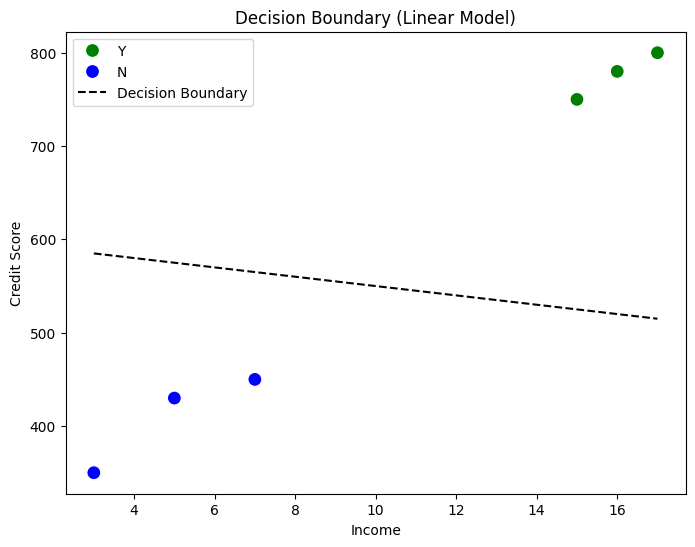

In [53]:
# Create range of income values
income_vals = np.linspace(df["income"].min(), df["income"].max(), 300)

# Decision boundary equation solved for credit_score
credit_boundary = (-(w1 * income_vals + w0)) / w2

# Plot customers
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="income",
    y="credit_score",
    hue="status",
    palette={"Y": "green", "N": "blue"},
    s=100
)

# Plot decision boundary
plt.plot(income_vals, credit_boundary, color="black", linestyle="--", label="Decision Boundary")

plt.xlabel("Income")
plt.ylabel("Credit Score")
plt.title("Decision Boundary (Linear Model)")
plt.legend()
plt.show()


## Part E: Challenge (Optional)


In [54]:
# 12) Standardize income and credit_score, then repeat Part A distance-based prediction.
# 13) Compare predictions before vs after standardization in a short note.
